In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
train_df = pd.read_csv('train.csv') #use train.csv only if you don't submit to competition
# test_df = pd.read_csv('test.csv') #use both train and test if you submit to competition.

In [7]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
train_df.shape

(1460, 81)

In [14]:
train_df['OverallQual']

0       7
1       6
2       7
3       7
4       8
       ..
1455    6
1456    6
1457    7
1458    5
1459    5
Name: OverallQual, Length: 1460, dtype: int64

In [8]:
train_df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [15]:
for cols in train_df.columns:
    if train_df[cols].isna().sum() > 0:
        print(cols, train_df[cols].isna().sum())

LotFrontage 259
Alley 1369
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


In [16]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [17]:
train_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [18]:
for col in train_df.columns:
    print(col, train_df[col].dtype)

Id int64
MSSubClass int64
MSZoning object
LotFrontage float64
LotArea int64
Street object
Alley object
LotShape object
LandContour object
Utilities object
LotConfig object
LandSlope object
Neighborhood object
Condition1 object
Condition2 object
BldgType object
HouseStyle object
OverallQual int64
OverallCond int64
YearBuilt int64
YearRemodAdd int64
RoofStyle object
RoofMatl object
Exterior1st object
Exterior2nd object
MasVnrType object
MasVnrArea float64
ExterQual object
ExterCond object
Foundation object
BsmtQual object
BsmtCond object
BsmtExposure object
BsmtFinType1 object
BsmtFinSF1 int64
BsmtFinType2 object
BsmtFinSF2 int64
BsmtUnfSF int64
TotalBsmtSF int64
Heating object
HeatingQC object
CentralAir object
Electrical object
1stFlrSF int64
2ndFlrSF int64
LowQualFinSF int64
GrLivArea int64
BsmtFullBath int64
BsmtHalfBath int64
FullBath int64
HalfBath int64
BedroomAbvGr int64
KitchenAbvGr int64
KitchenQual object
TotRmsAbvGrd int64
Functional object
Fireplaces int64
FireplaceQu object

<AxesSubplot:>

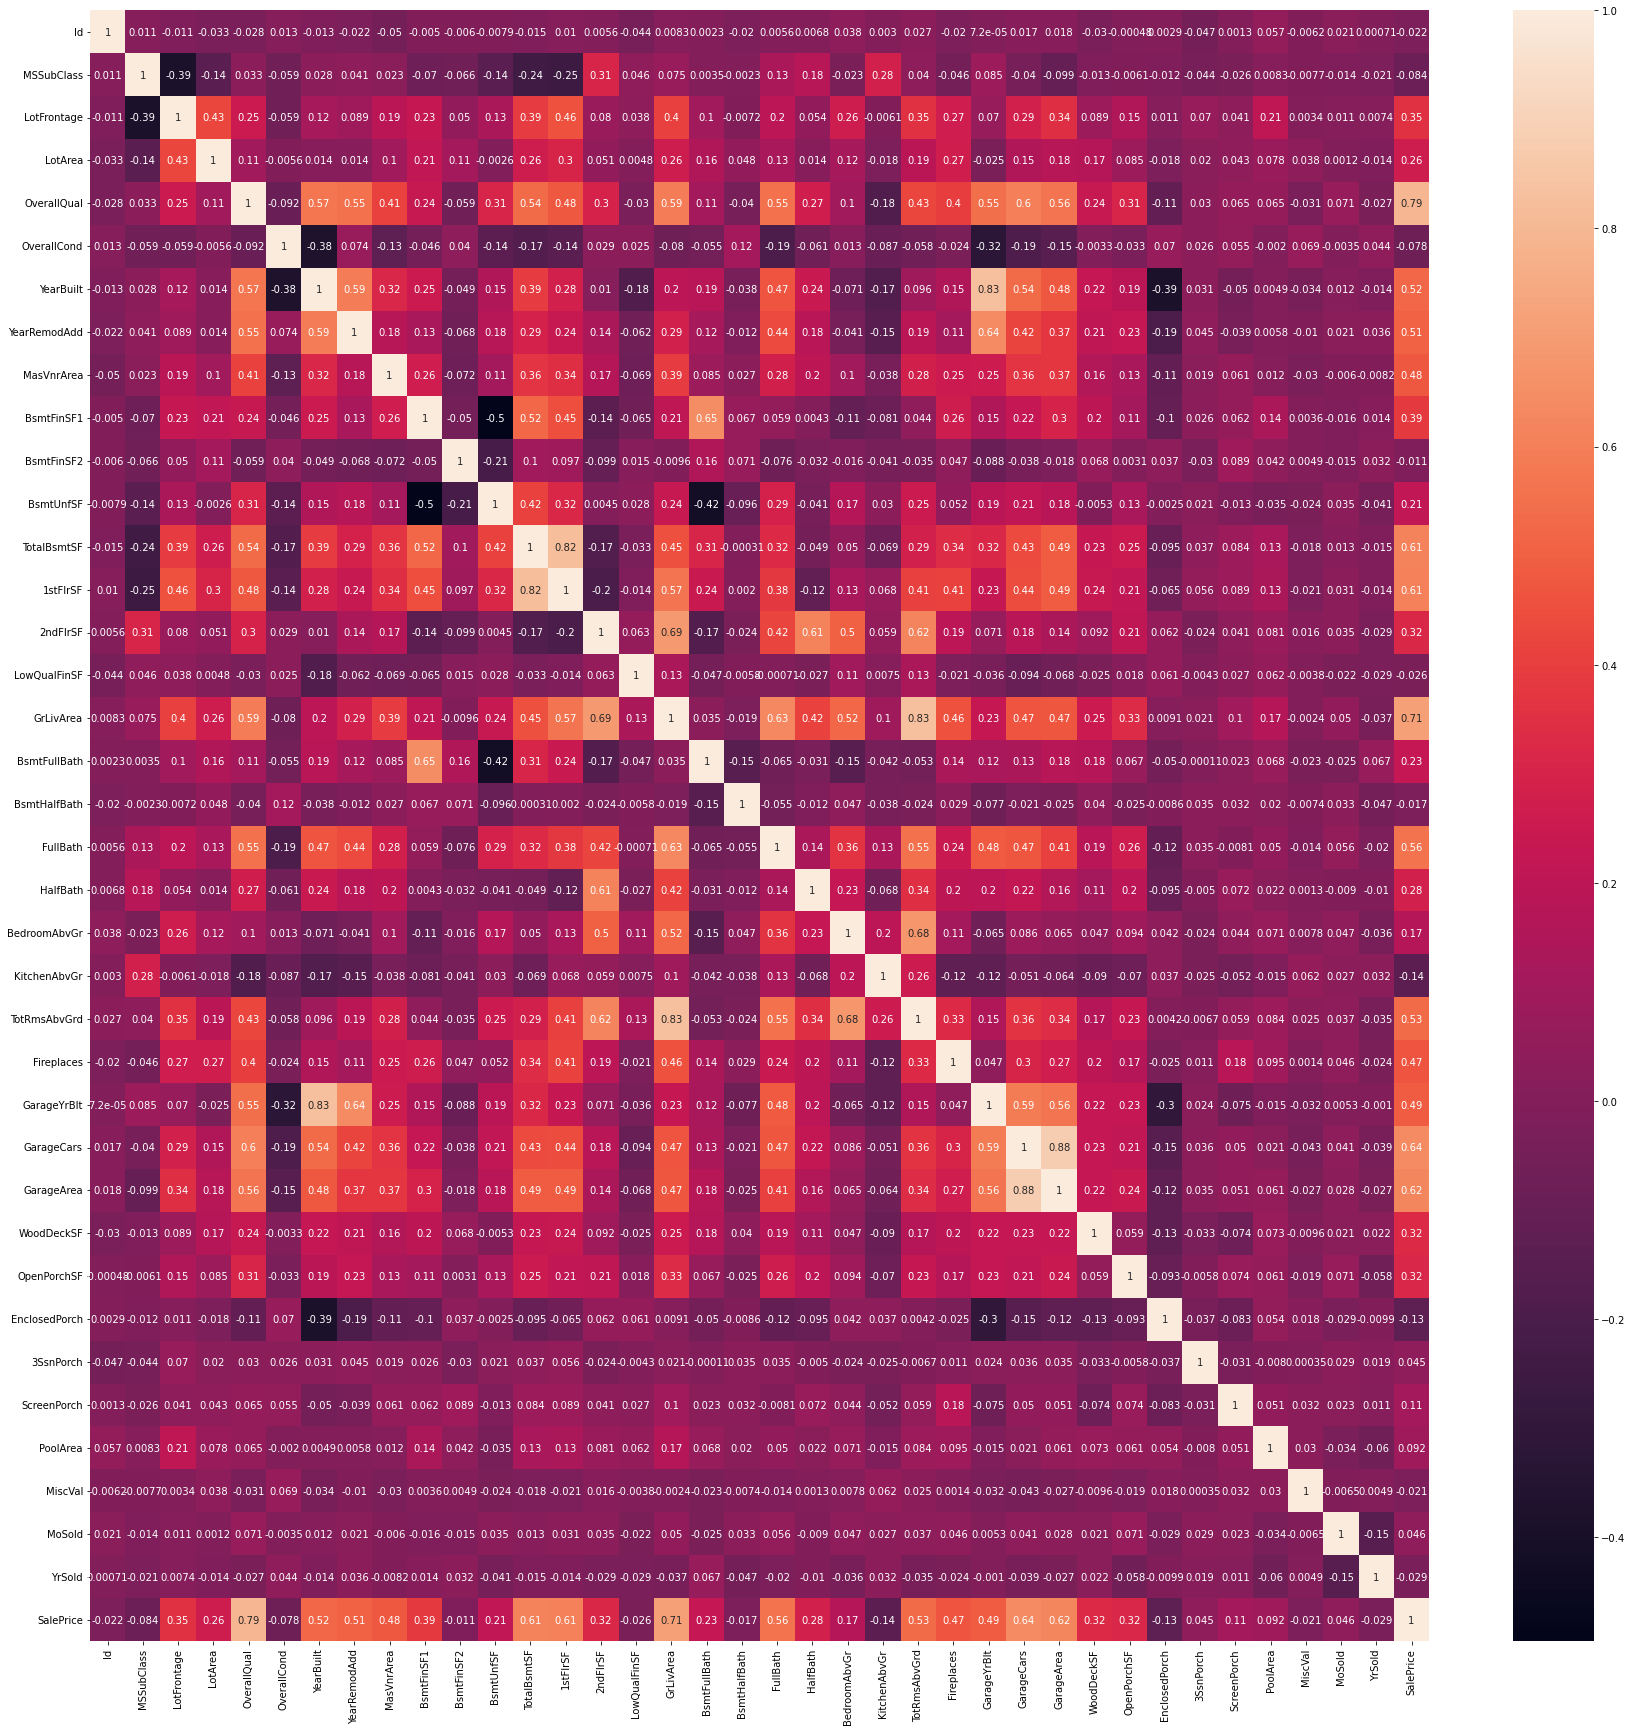

In [19]:
corr = train_df.corr()
plt.figure(figsize=(30, 30))
sns.heatmap(corr, annot=True)

In [4]:
df = train_df.dropna(axis=1)
df.shape

(1460, 62)

In [4]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [18]:
train_df.describe

<bound method NDFrame.describe of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour 

In [8]:
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [10]:
train_df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [13]:
train_df.shape

(1460, 81)

In [20]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [15]:
df = train_df.dropna(axis=1)

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

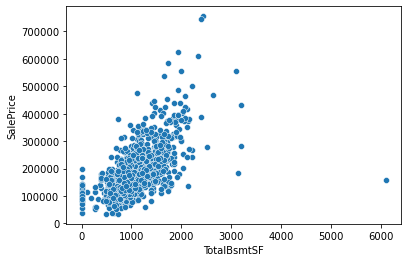

In [16]:
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=df)
#TotalBsmtSF --> total basement sq ft

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

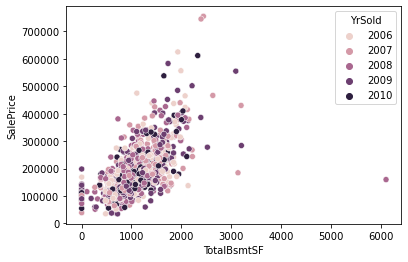

In [22]:
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', hue='YrSold', data=df)

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

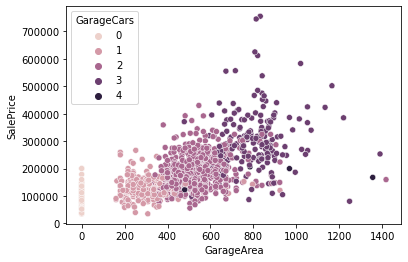

In [29]:
sns.scatterplot(x='GarageArea', y='SalePrice', hue='GarageCars', data=df)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

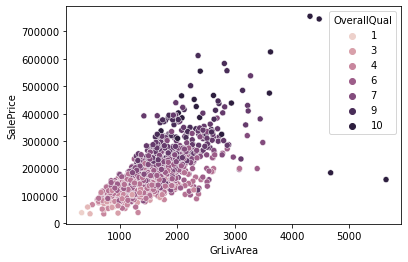

In [30]:
sns.scatterplot(x='GrLivArea', y='SalePrice', hue='OverallQual', data=df)

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

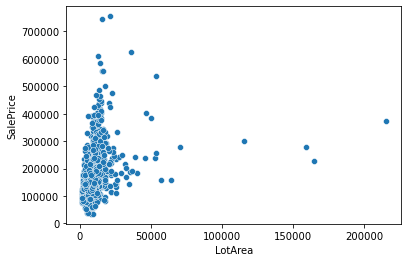

In [33]:
sns.scatterplot(data=df, y='SalePrice', x='LotArea')
#LotArea --> Lot size sq ft

<AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>

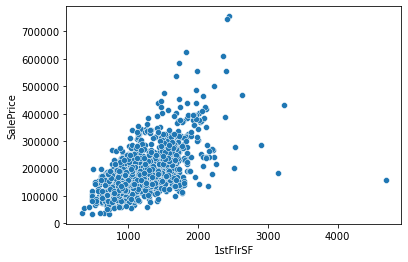

In [34]:
sns.scatterplot(data=df, y='SalePrice', x='1stFlrSF')

<AxesSubplot:xlabel='2ndFlrSF', ylabel='SalePrice'>

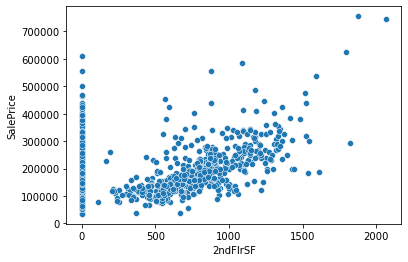

In [36]:
sns.scatterplot(data=df, y='SalePrice', x='2ndFlrSF')

<AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>

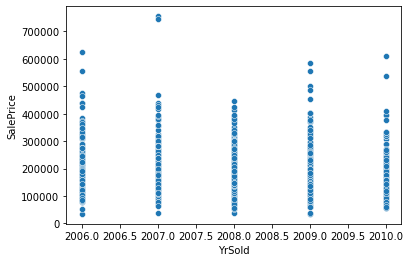

In [37]:
sns.scatterplot(data=df, y='SalePrice', x='YrSold')

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

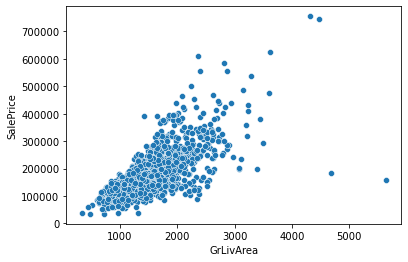

In [54]:
sns.scatterplot(data=df, y='SalePrice', x='GrLivArea')

<AxesSubplot:xlabel='BedroomAbvGr', ylabel='SalePrice'>

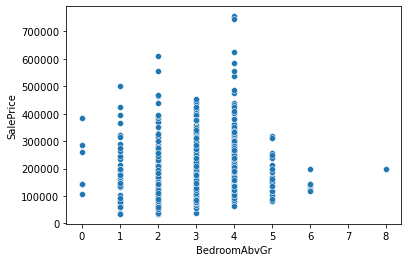

In [56]:
sns.scatterplot(data=df, y='SalePrice', x='BedroomAbvGr')

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

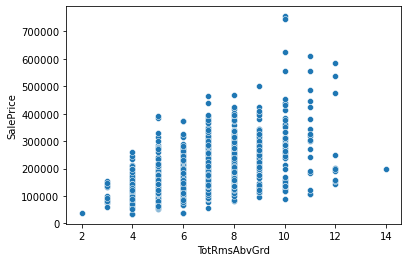

In [57]:
sns.scatterplot(data=df, y='SalePrice', x='TotRmsAbvGrd')

<AxesSubplot:xlabel='MoSold', ylabel='SalePrice'>

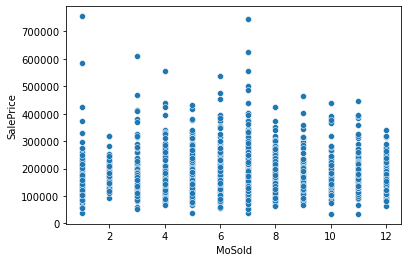

In [60]:
sns.scatterplot(data=df, y='SalePrice', x='MoSold')

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

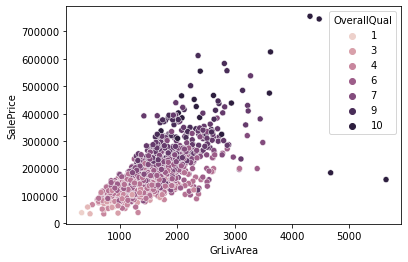

In [38]:
sns.scatterplot(data=df, y='SalePrice', x='GrLivArea', hue='OverallQual')

In [53]:
df['GrLivArea']

0       1710
1       1262
2       1786
3       1717
4       2198
        ... 
1455    1647
1456    2073
1457    2340
1458    1078
1459    1256
Name: GrLivArea, Length: 1460, dtype: int64

In [67]:
df.dtypes

Id                int64
MSSubClass        int64
MSZoning         object
LotArea           int64
Street           object
                  ...  
MoSold            int64
YrSold            int64
SaleType         object
SaleCondition    object
SalePrice         int64
Length: 62, dtype: object

In [39]:
#get numerical data features
num_data = df.select_dtypes(include=[np.number])

#get categorical features
cat_data = df.select_dtypes(exclude=[np.number])

In [60]:
num_data

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,0,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,13175,6,6,1978,1988,790,163,589,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,9042,7,9,1941,2006,275,0,877,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,9717,5,6,1950,1996,49,1029,0,...,366,0,112,0,0,0,0,4,2010,142125


## Exp 1

In [17]:
X = df[['OverallQual']]
y = df['SalePrice']
x_train, x_test, y_train, y_test = train_test_split(X, y)

In [18]:
# Initialize a linear regression model object
lr = LinearRegression() 

# Fit the linear regression model object to our data
lr.fit(x_train, y_train)

LinearRegression()

In [19]:
# The coefficients
print('Coefficients: ', lr.coef_)
print('Intercept: ', lr.intercept_)

Coefficients:  [45020.59106772]
Intercept:  -94218.3786744439


In [22]:
45020 * 5 -94218

130882

In [26]:
lr.predict([[5]])

C:\Users\agpju\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([130884.57666418])

In [27]:
y_pred = lr.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mse

2695074232.3198853

In [28]:
np.sqrt(mse)


51914.1043678872

## Exp 2

In [67]:
X = X = df[['OverallQual', 'GrLivArea', 'GarageArea','GarageCars']]
y = df['SalePrice']

In [68]:
from sklearn.preprocessing import StandardScaler

scaled = StandardScaler().fit_transform(X)

In [69]:
X_scaled = pd.DataFrame(scaled, columns = X.columns)
X_scaled

,OverallQual,GrLivArea,GarageArea,GarageCars
0,0.651479,0.370333,0.351000,0.311725
1,-0.071836,-0.482512,-0.060731,0.311725
2,0.651479,0.515013,0.631726,0.311725
3,0.651479,0.383659,0.790804,1.650307
4,1.374795,1.299326,1.698485,1.650307
...,...,...,...,...
1455,-0.071836,0.250402,-0.060731,0.311725
1456,-0.071836,1.061367,0.126420,0.311725
1457,0.651479,1.569647,-1.033914,-1.026858
1458,-0.795151,-0.832788,-1.090059,-1.026858


In [70]:
from sklearn.feature_selection import SelectKBest, f_regression

fs = SelectKBest(score_func = f_regression, k=2)
best = fs.fit_transform(X_scaled, y)

In [71]:
features = np.array(list(X_scaled.columns))

best_features = features[fs.get_support()]
print(best_features)

['OverallQual' 'GrLivArea']


<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

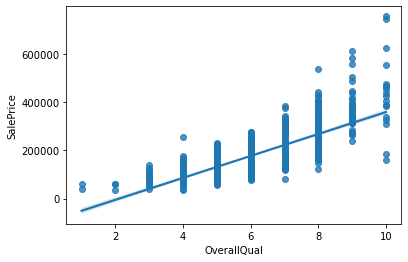

In [72]:
sns.regplot(data=df, y='SalePrice', x='OverallQual', fit_reg=True)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

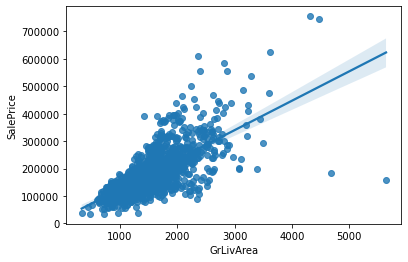

In [73]:
sns.regplot(data=df, y='SalePrice', x='GrLivArea', fit_reg=True)

In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled[best_features],y,test_size=0.3, random_state = 7)

In [75]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((1022, 2), (1022,), (438, 2), (438,))

In [76]:
lr = LinearRegression()

In [77]:
lr_model = lr.fit(X_train, y_train)

In [79]:
import statsmodels.api as sma
X2 = sma.add_constant(X_train)

est = sma.OLS(y_train,X2) 
est2 = est.fit()


In [80]:
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     1173.
Date:                Thu, 20 Oct 2022   Prob (F-statistic):          4.61e-265
Time:                        22:16:11   Log-Likelihood:                -12335.
No. Observations:                1022   AIC:                         2.468e+04
Df Residuals:                    1019   BIC:                         2.469e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.808e+05   1324.609    136.460      

In [81]:
print('Intercept:',lr_model.intercept_)
print('Coefficient:',lr_model.coef_[1])

Intercept: 180755.85958491953
Coefficient: 25095.603633959705


In [82]:
y_pred = lr_model.predict(X_test)

In [83]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test,y_pred)
print(mae)

29344.985427909152


In [84]:
mse = metrics.mean_squared_error(y_test,y_pred)
print(mse)
#this MSE is very high, making me question if this is the right model to use.

1910532686.7556465


In [85]:
rmse = metrics.mean_squared_error(y_test, y_pred, squared = False)
print(rmse)

43709.64066147932


In [86]:
X

,OverallQual,GrLivArea,GarageArea,GarageCars
0,7,1710,548,2
1,6,1262,460,2
2,7,1786,608,2
3,7,1717,642,3
4,8,2198,836,3
...,...,...,...,...
1455,6,1647,460,2
1456,6,2073,500,2
1457,7,2340,252,1
1458,5,1078,240,1


## Ex 2.1

In [12]:
X = df[['OverallQual', 'GrLivArea', 'GarageArea','GarageCars']]
y = df['SalePrice']

In [13]:
scaled = StandardScaler().fit_transform(X)

NameError: name 'StandardScaler' is not defined

In [90]:
X_scaled = pd.DataFrame(scaled, columns = X.columns)

In [91]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3, random_state = 7)

In [92]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((1022, 4), (1022,), (438, 4), (438,))

In [93]:
lr_model = lr.fit(X_train, y_train)

In [94]:
X2 = sma.add_constant(X_train)

est = sma.OLS(y_train,X2) 
est2 = est.fit()


In [95]:
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     690.7
Date:                Thu, 20 Oct 2022   Prob (F-statistic):          4.58e-288
Time:                        22:41:07   Log-Likelihood:                -12275.
No. Observations:                1022   AIC:                         2.456e+04
Df Residuals:                    1017   BIC:                         2.458e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.809e+05   1250.254    144.661      

In [96]:
print('Intercept:',lr_model.intercept_)
print('Coefficient:',lr_model.coef_[1])

Intercept: 180862.34987845275
Coefficient: 21786.67306709056


In [97]:
y_pred = lr_model.predict(X_test)

In [98]:
mae = metrics.mean_absolute_error(y_test,y_pred)
print(mae)

28359.53588908106


In [99]:
mse = metrics.mean_squared_error(y_test,y_pred)
print(mse)

1795867681.669729


In [100]:
rmse = metrics.mean_squared_error(y_test, y_pred, squared = False)
print(rmse)

42377.679050058054


## Experiment 3

In [ ]:
# Trying to run another linear regression test, but this time remove outliers first.

<AxesSubplot:xlabel='SalePrice'>

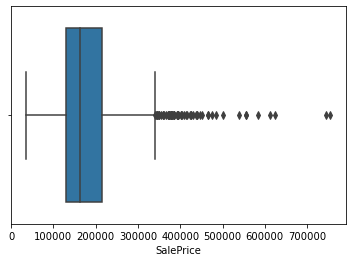

In [7]:
# Sale price box plot
sns.boxplot(x=df['SalePrice'])

In [29]:
min_threshold, max_threshold = df.SalePrice.quantile([0.02, 0.98])
min_threshold, max_threshold

(79000.0, 394931.06)

In [30]:
#saves rows where the sale price is between the min and max threshold. everything else is an outlier
df2 = df[(df.SalePrice < max_threshold) & (df.SalePrice > min_threshold)]
df2.shape

(1398, 62)

<AxesSubplot:xlabel='SalePrice'>

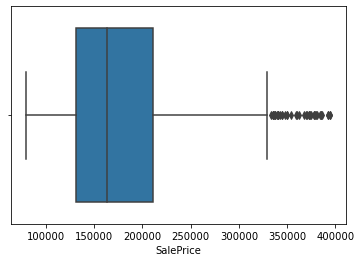

In [31]:
sns.boxplot(x=df2['SalePrice'])

In [32]:
X = df2[['OverallQual', 'GrLivArea', 'GarageArea','GarageCars']]
y = df2['SalePrice']

In [33]:
reg = LinearRegression().fit(X, y)

In [34]:
coefficients = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(np.transpose(reg.coef_))], axis = 1)
coefficients

,0,0
0,OverallQual,25173.307730
1,GrLivArea,36.405808
2,GarageArea,34.884126
3,GarageCars,12510.100054


In [35]:
reg.score(X, y)

0.7336065974503818

In [36]:
import statsmodels.api as sm
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     959.0
Date:                Tue, 25 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:41:11   Log-Likelihood:                -16527.
No. Observations:                1398   AIC:                         3.306e+04
Df Residuals:                    1393   BIC:                         3.309e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6.943e+04   4345.082    -15.979      0.000    -7.8e+04   -6.09e+04
OverallQual  2.517e+04    905.356     27.805      0.000    2.34e+04    2.69e+04
GrLivArea      36.4058      2.195     16.588      0.000      32.101      40.711
GarageArea     34.8841      8.877      3.930      0.000      17.471      52.298
GarageCars   1.251e+04   2598.137      4.815      0.000    7413.417    1.76e+04
==============================================================================
Omnibus:                      252.552   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4047.963
Skew:                          -0.325   Prob(JB):                         0.00
Kurtosis:                      11.311   Cond. No.                     8.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test,y_pred)
print(mae)

35338.59991824826


In [40]:
mse = metrics.mean_squared_error(y_test,y_pred)
print(mse)

2695074232.3198853


In [41]:
rmse = metrics.mean_squared_error(y_test, y_pred, squared = False)
print(rmse)

51914.1043678872
